In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
sns.set_palette("Paired")

In [2]:
# Reading in Clensed Datasets

In [3]:
df_sj = pd.read_table('df_sj.csv', sep=',', header=0, delimiter=None, doublequote=True, engine='python')
df_sj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 26 columns):
Unnamed: 0                               936 non-null int64
city                                     936 non-null object
year                                     936 non-null int64
weekofyear                               936 non-null int64
week_start_date                          936 non-null object
ndvi_ne                                  936 non-null float64
ndvi_nw                                  936 non-null float64
ndvi_se                                  936 non-null float64
ndvi_sw                                  936 non-null float64
precipitation_amt_mm                     936 non-null float64
reanalysis_air_temp_k                    936 non-null float64
reanalysis_avg_temp_k                    936 non-null float64
reanalysis_dew_point_temp_k              936 non-null float64
reanalysis_max_air_temp_k                936 non-null float64
reanalysis_min_air_temp_k          

In [4]:
df_iq = pd.read_table('df_iq.csv', sep=',', header=0, delimiter=None, doublequote=True, engine='python')
df_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 26 columns):
Unnamed: 0                               520 non-null int64
city                                     520 non-null object
year                                     520 non-null int64
weekofyear                               520 non-null int64
week_start_date                          520 non-null object
ndvi_ne                                  520 non-null float64
ndvi_nw                                  520 non-null float64
ndvi_se                                  520 non-null float64
ndvi_sw                                  520 non-null float64
precipitation_amt_mm                     520 non-null float64
reanalysis_air_temp_k                    520 non-null float64
reanalysis_avg_temp_k                    520 non-null float64
reanalysis_dew_point_temp_k              520 non-null float64
reanalysis_max_air_temp_k                520 non-null float64
reanalysis_min_air_temp_k          

# [i] Vegetation Attribute: NDVI - Normalized Difference Vegetation Index

<a href="https://www.sentinel-hub.com/eoproducts/ndvi-normalized-difference-vegetation-index" target="_blank">NDVI</a> stands for "Normalized Difference Vegetation Index". The value range of the index is from -1 to 1.

The NDVI values individuate the type of vegetation in a given region:
1.	Water - Negative values approaching -1
2.	Barren areas of rock, sand, or snow - Values close to zero (-0.1 to 0.1)
3.	Shrub/Grassland - Low, positive values (approximately 0.2 to 0.4)
4.	Tropical Rainforest - High values (values approaching 1).

The above rules above was used to assign the vegation type to the NDVI values for 'ndvi_ne','ndvi_nw','ndvi_se' and 'ndvi_sw'.

In [5]:
#Step 1: Merge the data set back together
df_merge=pd.concat([df_sj,df_iq])
df_merge.head(5)

,Unnamed: 0,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [6]:
#Step 2: Assignment the df_merge type to the NDVI value
df_merge['veg_type_ne']=df_merge['ndvi_ne'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_nw']=df_merge['ndvi_nw'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_se']=df_merge['ndvi_se'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge['veg_type_sw']=df_merge['ndvi_sw'].apply(lambda x:'water' if x<-0.1
                                              else 'barren' if (x<=0.1 and x>=-0.1)
                                              else 'grassland' if (x<=0.4 and x>0.1)
                                              else 'tropical' if (x<=1.0 and x>0.4)
                                              else 'unknown')
df_merge.head(10)

,Unnamed: 0,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
0,0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,25.442857,6.900000,29.4,20.0,16.0,4,grassland,grassland,grassland,grassland
1,1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,26.714286,6.371429,31.7,22.2,8.6,5,grassland,grassland,grassland,grassland
2,2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.714286,6.485714,32.2,22.8,41.4,4,barren,grassland,grassland,grassland
3,3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,27.471429,6.771429,33.3,23.3,4.0,3,grassland,grassland,grassland,grassland
4,4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,28.942857,9.371429,35.0,23.9,5.8,6,grassland,grassland,grassland,grassland
5,5,sj,1990,23,1990-06-04,0.196200,0.174850,0.254314,0.181743,9.58,...,28.114286,6.942857,34.4,23.9,39.1,2,grassland,grassland,grassland,grassland
6,6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,...,27.414286,6.771429,32.2,23.3,29.7,4,grassland,barren,grassland,grassland
7,7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,...,28.371429,7.685714,33.9,22.8,21.1,5,barren,barren,grassland,grassland
8,8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,...,28.328571,7.385714,33.9,22.8,21.1,10,grassland,grassland,grassland,grassland
9,9,sj,1990,27,1990-07-02,0.102450,0.121550,0.160683,0.202567,14.41,...,28.328571,6.514286,33.9,24.4,1.1,6,grassland,grassland,grassland,grassland


In [7]:
df_merge.drop(columns=['Unnamed: 0'])

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,veg_type_ne,veg_type_nw,veg_type_se,veg_type_sw
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,25.442857,6.900000,29.4,20.0,16.0,4,grassland,grassland,grassland,grassland
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,26.714286,6.371429,31.7,22.2,8.6,5,grassland,grassland,grassland,grassland
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.714286,6.485714,32.2,22.8,41.4,4,barren,grassland,grassland,grassland
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,27.471429,6.771429,33.3,23.3,4.0,3,grassland,grassland,grassland,grassland
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,28.942857,9.371429,35.0,23.9,5.8,6,grassland,grassland,grassland,grassland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,28.633333,11.933333,35.4,22.4,27.0,5,grassland,grassland,grassland,grassland
516,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,27.433333,10.500000,34.7,21.7,36.6,8,grassland,grassland,grassland,grassland
517,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,24.400000,6.900000,32.2,19.2,7.4,1,grassland,grassland,grassland,grassland
518,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,25.433333,8.733333,31.2,21.0,16.0,1,grassland,grassland,grassland,grassland


The next 4 timeseries plot illustrative how the NDVI values have changed over the years in each city. NDVI appears relatively stationary as no clear increasing of decreasing trends presist overtime.

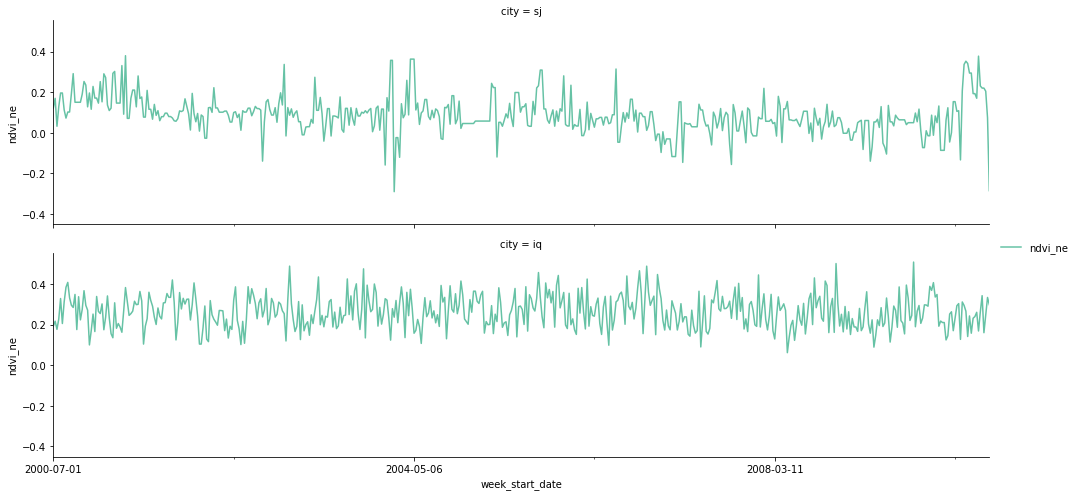

In [8]:
def dateplot(x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, ax=ax, grid=False, **kwargs)
    
def dateplot2(x, y, **kwargs):
    ax = plt.gca()
    data2 = kwargs.pop("data")
    data2.plot(x=x, y=y, ax=ax2, grid=False, **kwargs)
    
sns.set_palette('Set2')
g = sns.FacetGrid(df_merge,height=3.5,row='city',aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'ndvi_ne')
g.add_legend();

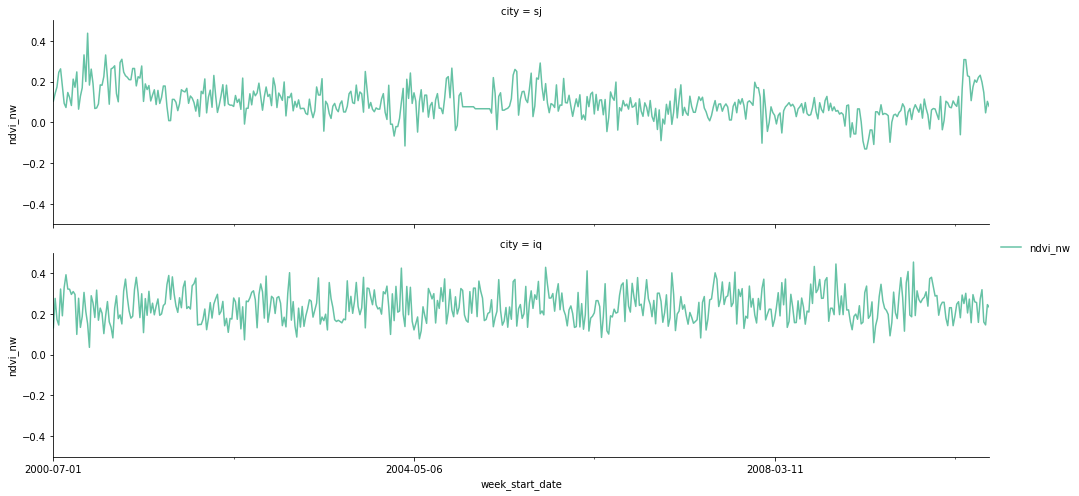

In [9]:
sns.set_palette('Set2')
g = sns.FacetGrid(df_merge,height=3.5,row='city',aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'ndvi_nw')
g.add_legend();

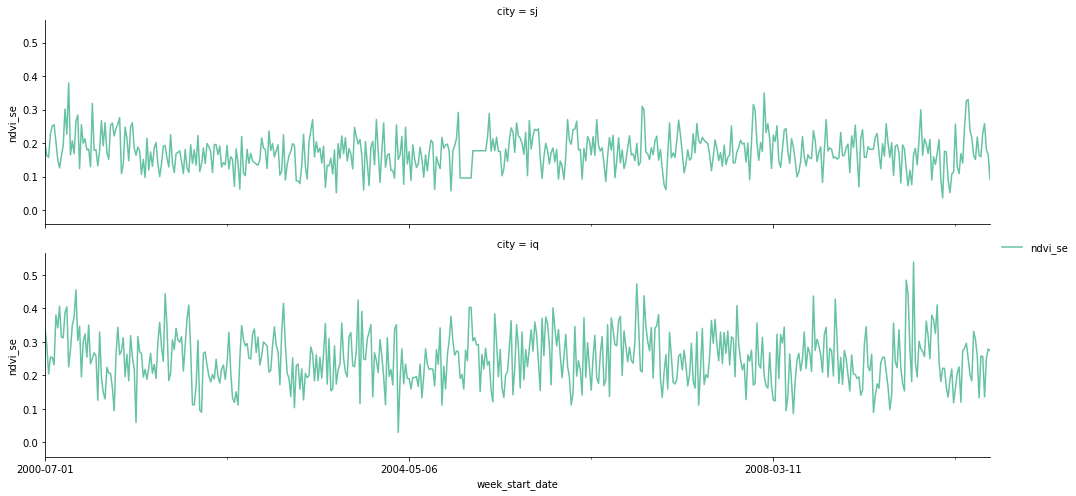

In [10]:
sns.set_palette('Set2')
g = sns.FacetGrid(df_merge,height=3.5,row='city',aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'ndvi_se')
g.add_legend();

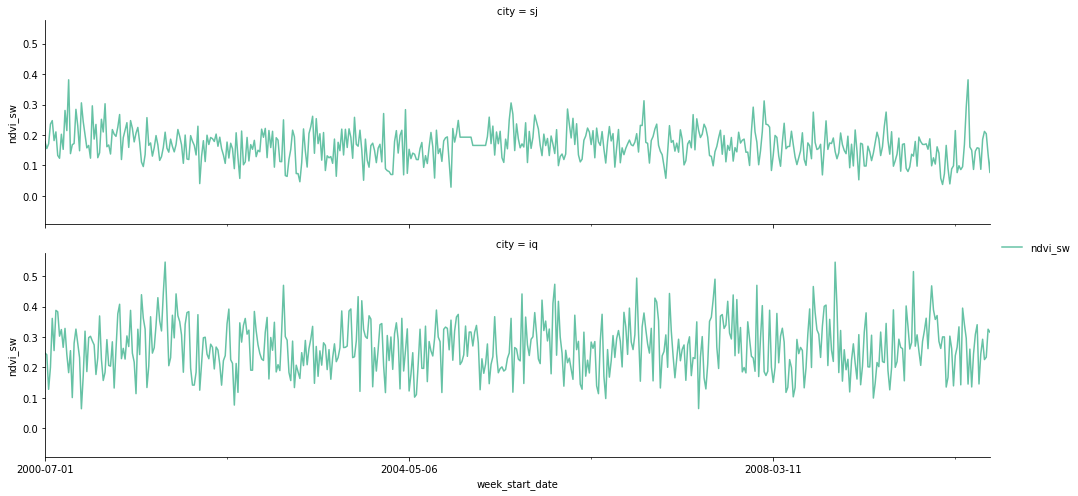

In [11]:
sns.set_palette('Set2')
g = sns.FacetGrid(df_merge,height=3.5,row='city',aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'ndvi_sw')
g.add_legend();

The following 4 scatterplots aim to show the common vegetation types present in the 4 regions of each city. The NDVI value is plotted against the "total_cases" in each region. The colour indicates the vegetation type.

In San Juan, the North East and North West areas with the most number of cases occurring with the land is more barren. In the South East and South West areas of San Juan, Dengue fever cases occur when the area is more Grassland. In Iquitos, when the area is more Grassland it results in the highest number of Dengue cases.

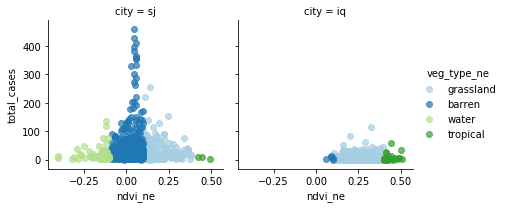

In [12]:
sns.set_palette("Paired")
g = sns.FacetGrid(df_merge, col='city',hue='veg_type_ne')
g.map(plt.scatter, 'ndvi_ne', 'total_cases', alpha=.7)
g.add_legend();

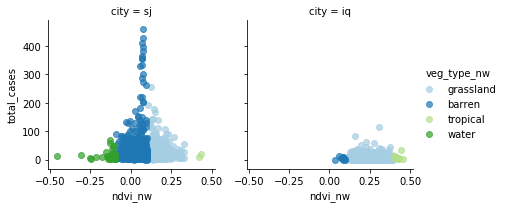

In [13]:
g = sns.FacetGrid(df_merge, col='city',hue='veg_type_nw')
g.map(plt.scatter, 'ndvi_nw', 'total_cases', alpha=.7)
g.add_legend();

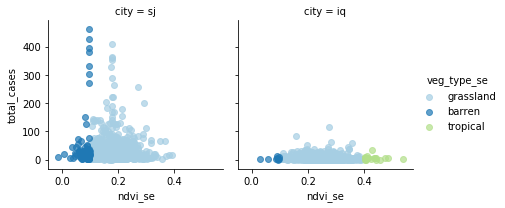

In [14]:
g = sns.FacetGrid(df_merge, col='city',hue='veg_type_se')
g.map(plt.scatter, 'ndvi_se', 'total_cases', alpha=.7)
g.add_legend();

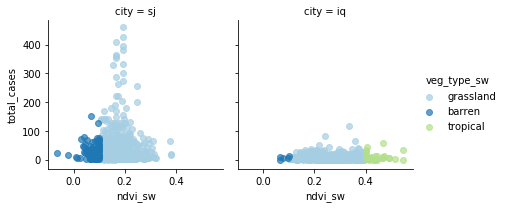

In [15]:
g = sns.FacetGrid(df_merge, col='city',hue='veg_type_sw')
g.map(plt.scatter, 'ndvi_sw', 'total_cases', alpha=.7)
g.add_legend();

# [ii] Humidity Attribute

In the timeseries below, it is clear that Iquitos exhibits higher hudity levels than San Juan.

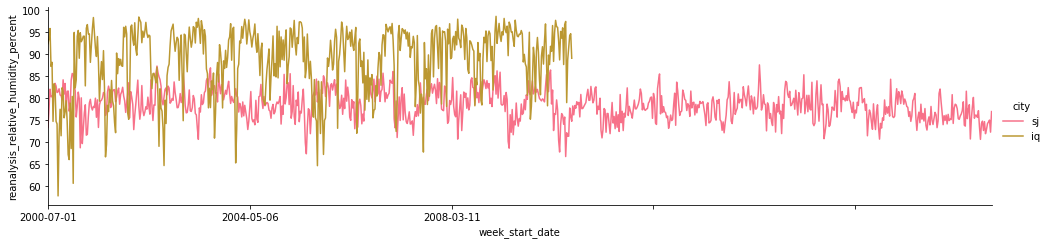

In [16]:
sns.set_palette('husl')
g = sns.FacetGrid(df_merge,height=3.5, aspect=4,hue='city')
g = g.map_dataframe(dateplot, 'week_start_date', 'reanalysis_relative_humidity_percent')
g.add_legend();

In the next 2 time series plots, "total_cases" was layered in:
* In San Juan, humidity levels are quite seasonal. Total cases (indicated by the blue line) tends to spike when humidity reaches high levels.
* In Iquitos, there isn't a clear relationship between total cases and humidty levels.

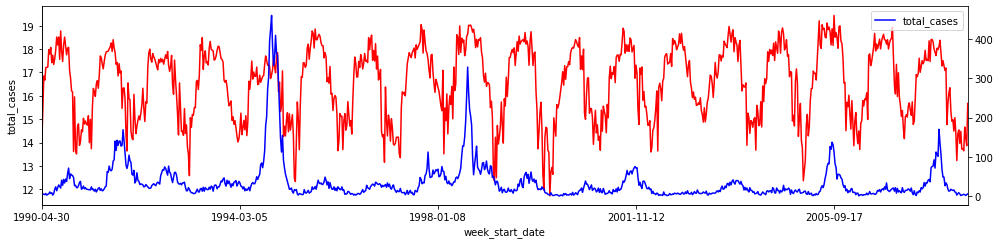

In [17]:
g = sns.FacetGrid(df_sj, height=3.5, aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'reanalysis_specific_humidity_g_per_kg',color='r')
ax2 = plt.twinx()
g = g.map_dataframe(dateplot2, 'week_start_date', 'total_cases',color='b')

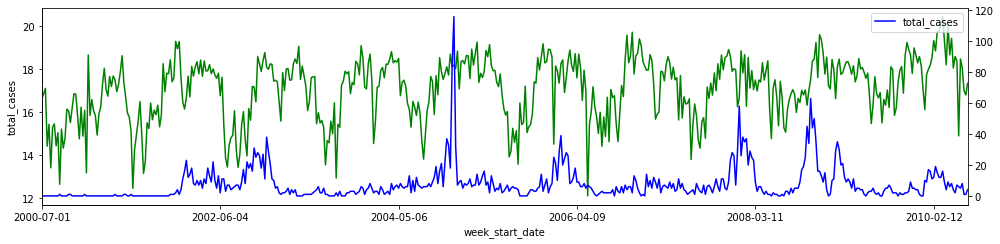

In [18]:
g = sns.FacetGrid(df_iq, height=3.5, aspect=4)
g = g.map_dataframe(dateplot, 'week_start_date', 'reanalysis_specific_humidity_g_per_kg',color='g')
ax2 = plt.twinx()
g = g.map_dataframe(dateplot2, 'week_start_date', 'total_cases',color='b')

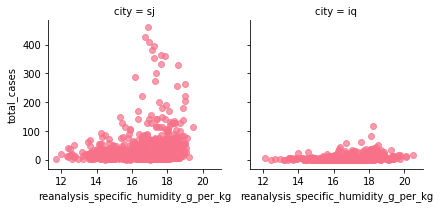

In [19]:
g = sns.FacetGrid(df_merge, col='city')
g.map(plt.scatter, 'reanalysis_specific_humidity_g_per_kg', 'total_cases', alpha=.7)
g.add_legend();